# Binary Search Tree

Based on information from:

- http://cslibrary.stanford.edu/110/BinaryTrees.html

## Basic Binary Tree

A binary tree is a data structure that contains value as well as a pointer to a left and a right binary tree (recursive).

In [6]:
class BinaryTree:
    def __init__(self, val, left = None, right = None):
        self.val = val;
        self.left = left;
        self.right = right;

The first thing we'll do is write a `render_tree` function that takes a `BinaryTree` and returns an SVG visualization for it.

In [21]:
import graphviz

def render_tree(tree):
    dot = graphviz.Digraph()
    # render_tree could be written as a recursive function, but using a loop and managing our own stack
    # is superior here, as we don't have to write awkward special-case logic for the top level call that
    # needs to initialize the Digraph and return an svg.
    stack = [tree]
    emptyID = 0
    while len(stack) > 0:
        head = stack.pop(0)
        dot.node('{}'.format(head.val))
        for child in [head.left, head.right]:
            if child is None:
                emptyID += 1
                childVal = 'empty{}'.format(emptyID)
                dot.node('{}'.format(childVal), style='invisible')
            else:
                childVal = child.val
                stack.append(child)
            dot.edge('{}'.format(head.val), '{}'.format(childVal))
    
    return dot._repr_svg_()
# _repr_svg_ is used by Jupyter notebook when deciding how to display a BinaryTree cell value. 
BinaryTree._repr_svg_ = render_tree

Let's test our tree rendering, below is a trivial binary tree containing a single value:

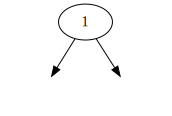

In [22]:
BinaryTree(1)

Okay, now let's try a bigger and more interesting tree that includes a half-empty node as well.

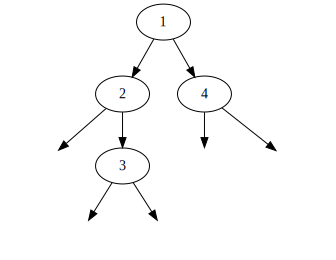

In [26]:
BinaryTree(1, left=BinaryTree(2, right=BinaryTree(3)), right=BinaryTree(4))